### [Build a Web Scraper with Python in 8 Minutes](https://towardsdatascience.com/scrape-websites-using-python-in-5-minutes-931cd9f44443)

In [138]:
import requests
from bs4 import BeautifulSoup
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [3]:
from fake_useragent import UserAgent
ua = UserAgent()
ua.safari

'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; fr-fr) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.4 Safari/533.20.27'

In [4]:
#Used headers/agent because the request was timed out and asking for an agent. 
#Using following code we can fake the agent.
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'}
response = requests.get("https://www.classcentral.com/subject/data-science", headers=headers, verify=True)

In [5]:
content = response.content
soup = BeautifulSoup(content, "html.parser")

In [12]:
#top_rest = soup.find_all("tbody",attrs={"id": "course-listing-tbody"})
#list_tr = top_rest[0].find_all("div",attrs={"class": "bke1zw-1"})
top_rest = soup.find_all("span",attrs={"class": "text-1 weight-semi line-tight"})

In [13]:
course = []
for tr in top_rest:
    s = tr.get_text().strip()
    course.append(s)

In [14]:
#print(soup.prettify())
len(course)

50

In [15]:
#top_rest = soup.find_all("tbody",attrs={"id": "course-listing-tbody"})
#list_tr = top_rest[0].find_all("div",attrs={"class": "bke1zw-1"})
#course_provider = soup.find_all("div",attrs={"class": "truncate"})
# Provider/Offered By:
provider = []
for i in soup.find_all('a', href=True, attrs={'class':'color-charcoal italic'}):
    s = i.get_text().strip()
    provider.append(s)

In [16]:
len(provider)

50

In [21]:
rating = []
for i in soup.find_all('div', attrs={'class':'col border-box text-center nowrap row large-up-text-right padding-horz-small push'}):
    s = i.find('span', attrs={'class':'xlarge-up-hidden color-charcoal text-center'})
    if s is not None:
        rating.append(s.text.strip())
    else:
        rating.append('-1')

In [22]:
rating[1]

'3.3'

In [32]:
num_reviews = []
for i in soup.find_all("span",{'class' : 'large-down-hidden block line-tight text-4 color-gray'}):
    num_reviews.append(int(i.text.strip().replace(' Reviews', '')))
num_reviews[48]

20

In [48]:
duration = []
for i in soup.findAll('div', attrs={'class':'small-down-text-2 text-3 row vert-align-middle'}):
    s = i.find('span', attrs={'class':'hidden medium-up-inline-block small-down-text-2 text-3 large-up-margin-left-xxsmall icon-clock-charcoal icon-left-small'})
    s = s.text.strip()
    s = " ".join(s.split())
    s = s.replace('\n', '').replace(' ,', ',').strip()
    if s is not None:
        duration.append(s)
    else:
        duration.append('-1')

In [61]:
import pandas as pd
df = pd.DataFrame({'course':course, 'ratings': rating, 'reviews':num_reviews,
                  'provider':provider, 'duration': duration})

In [62]:
df.head(10)

,course,ratings,reviews,provider,duration
0,R Programming,2.8,245,Coursera,"57 hours worth of material, 4 weeks long"
1,The Data Scientist’s Toolbox,3.3,165,Coursera,"18 hours worth of material, 4 weeks long"
2,Computational Social Science,4.8,76,Coursera,"3 hours a week, 26 weeks long"
3,Getting and Cleaning Data,3.5,57,Coursera,"19 hours worth of material, 4 weeks long"
4,The Analytics Edge,4.7,80,edX,"10-15 hours a week, 13 weeks long"
5,Exploratory Data Analysis,3.9,39,Coursera,1 week long
6,Become a Data Analyst,4.5,64,Udacity,"10 hours a week, 17 weeks long"
7,Introduction to Big Data,2.7,35,Coursera,"17 hours worth of material, 3 weeks long"
8,Introduction to Data Science in Python,2.4,46,Coursera,"29 hours worth of material, 4 weeks long"
9,Python for Data Science,4.4,47,edX,"8-10 hours a week, 10 weeks long"


In [104]:
df['ratings'] = df['ratings'].astype('float64')
#df.dtypes
#df.groupby('provider')['reviews','ratings'].agg(['sum'])
df1 = df.groupby('provider')['ratings'].agg(['mean'])
df2 = df.groupby('provider')['reviews'].agg(['sum'])
pd.concat([df1, df2], sort=True, axis=1)

,mean,sum
provider,,
Coursera,3.300000,1005
FutureLearn,4.700000,34
Independent,5.000000,41
Udacity,4.500000,64
edX,4.015789,390


Text(0, 0.5, 'Mean rating')

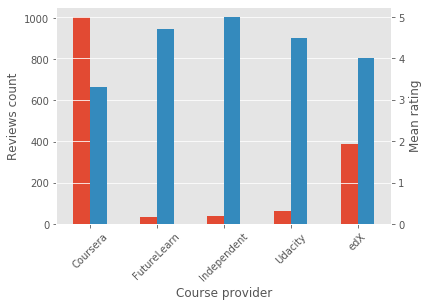

In [146]:
df_agg = df.groupby('provider').agg({'reviews':['sum'], 'ratings': ['mean']})
df_agg.columns = df_agg.columns.map('_'.join)
ax = df_agg.plot(kind='bar', secondary_y='ratings_mean', rot=45, legend=False)
ax.set_xlabel('Course provider')
ax.set_ylabel('Reviews count')
plt.ylabel('Mean rating', rotation=90)

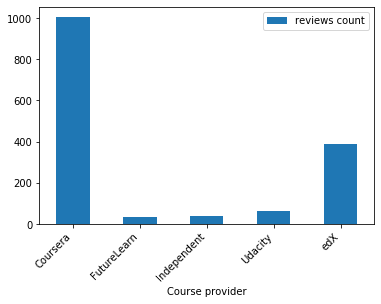

In [129]:
ax = df.groupby('provider')['reviews'].agg(['sum']).plot.bar()
#ax = df.plot(kind= 'bar' , secondary_y= 'amount' , rot= 0)
ax.set_xlabel('Course provider')
plt.xticks(rotation=45, ha='right')
ax.legend(['reviews count'])
plt.show()

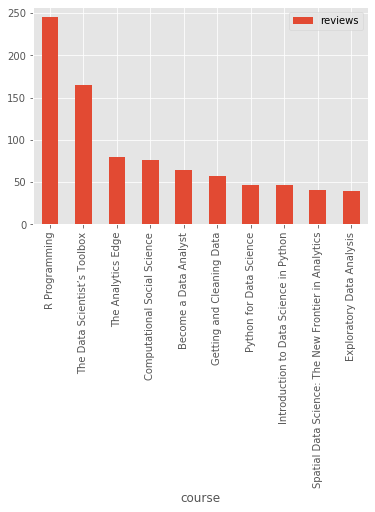

In [162]:
ax = df[['course','reviews']].set_index('course').sort_values('reviews', ascending=False).head(10).plot(kind='bar')